# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

### This is to connect to the sql server from IronHack, but I did this Lab at home. So I exported the .csv dataset from sequel pro and work with it.

##CONNECTION
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'employees'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'
engine = create_engine(connection_string)

query = 'SELECT * from users'
employees = pd.read_sql(query,engine)
employees


In [2]:
import pandas as pd
employees = pd.read_csv('../employees.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
salary_avg_1 = employees.groupby(['Department']).mean()[['Salary']]
salary_avg_1

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
import numpy as np
salary_avg_2 = pd.pivot_table(employees, values='Salary', index=['Department'], aggfunc=np.mean)
salary_avg_2

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
salary_by_dpmnt_title = pd.pivot_table(employees, values='Salary', index=['Department','Title'], aggfunc=np.mean)
salary_by_dpmnt_title

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
salary_years = pd.pivot_table(employees, values = ['Years','Salary'], index = ['Title'])

salary_years

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
salary_numbers = pd.pivot_table(employees, values=['Salary'], index=['Department','Title'])
salary_numbers

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
salary_attributes = pd. pivot_table(employees, values = ['Salary'], index = ['Department','Title'], aggfunc = {'Salary':[np.mean,min,max, np.std]})
salary_attributes

Salary                      
                        max  mean   min       std
Department Title                                 
HR         VP          70.0  70.0  70.0       NaN
           analyst     35.0  32.5  30.0  3.535534
IT         VP          70.0  70.0  70.0       NaN
           analyst     35.0  32.5  30.0  3.535534
           associate   60.0  60.0  60.0       NaN
Sales      associate   55.0  55.0  55.0  0.000000

### In general, table shows how the std is max of 3,53 due to the limited number of samples (employees) questioned. 

### When there is no difference between max and min, the standard deviation can not be calculted, and shows an NotANumber NaN

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
salary_attributes = pd. pivot_table(employees, values = ['Salary'], index = ['Department','Title'], aggfunc = {'Salary':[np.mean,min,max, np.std]},fill_value = 0)
salary_attributes

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60  0.000000
Sales      associate     55  55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [10]:
salary_stakeholders = pd. pivot_table(employees, values = ['Salary'], index = ['Department'],aggfunc = {'Salary':['count',np.sum]})
salary_stakeholders

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [11]:
final_Q = pd.pivot_table(employees, values=['Salary','Years'],index = ['Department','Title'],aggfunc = {'Salary':'mean','Years':'sum'})
final_Q

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [12]:
max_salary = pd.pivot_table(employees,values=['Salary'],index=['Department'],aggfunc={'Salary':'max'})
max_salary

,Salary
Department,
HR,70
IT,70
Sales,55


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [13]:
import pandas as pd
fitbit = pd.read_csv('../fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [14]:
import pandas as pd
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [15]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [16]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [17]:
import matplotlib.pyplot as plt

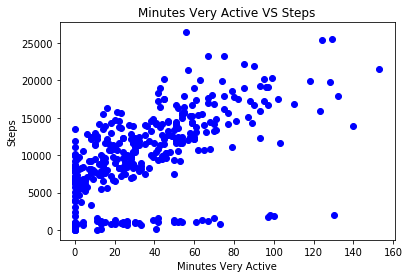

In [18]:

plt.plot(fitbit['Minutes Very Active'], fitbit['Steps'],'bo')
plt.title('Minutes Very Active VS Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

### There is no clear correlation, many data seems following a linear distribution.

### But, some data keep to zero independent if the user is very active.

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [19]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

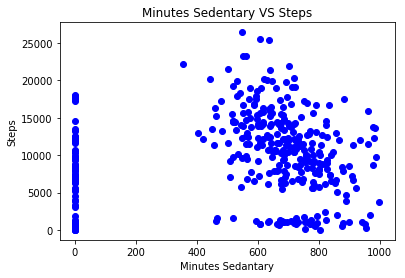

In [20]:

plt.plot(fitbit['Minutes Sedentary'], fitbit['Steps'],'bo')
plt.title('Minutes Sedentary VS Steps')
plt.xlabel('Minutes Sedantary')
plt.ylabel('Steps')
plt.show()


### Cheking the correlation value =  0.07 implies there is no correlation at all. 

### Looking the plot, there are two points:

#### 1. There is a mal-function in the system, due to there are a lot of DIFFERENT KIND OF data of STEPS meanwhile the user is moving at different steps rythm

#### 2. The second point is there are a lot of information with no clear pattern when 'Minutes Sedantary' takes a high value.

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [21]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

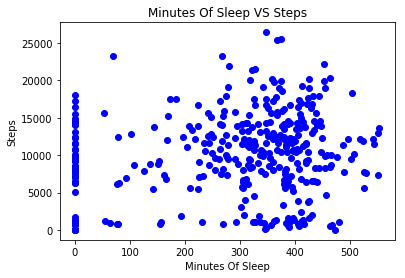

In [22]:

plt.plot(fitbit['MinutesOfSleep'], fitbit['Steps'],'bo')
plt.title('Minutes Of Sleep VS Steps')
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.show()


### Cheking the correlation value =  0.13, it  implies there is no correlation at all. (It is twice higher than 'Minutes Sedentary', but still is too low to take into account.)

### Looking the plot, there are two points:

#### 1. There is a mal-function in the system, due to there are a lot of DIFFERENT KIND OF data of STEPS meanwhile the user is sleeping (no sense, but the user is a 'sleepwalker').

#### 2. The second point is there are a lot of information with no clear pattern when 'Minutes Sedantary' takes a high value.



#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [23]:
fitbit_new = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
cor_fit = fitbit_new.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [24]:
cor_fit.sort_values('Steps', ascending=False)[['Steps']]

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [25]:
import pandas as pd
grades = pd.read_csv('../time_grades.csv')
grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

In [26]:
frequency = pd.pivot_table(grades, values = ['Study time','Grade'], index = ['Grade'], aggfunc ={'Study time':'sum'})
frequency


,Study time
Grade,
1,2
2,3
3,12
4,4
5,6
7,42
8,20
9,46


#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [27]:
corr_pearson = grades['Study time'].corr(grades['Grade'], method = 'pearson')

corr_spearman = grades['Study time'].corr(grades['Grade'], method = 'spearman')

print(f'''
correalation pearson = {corr_pearson}
correlation spearman = {corr_spearman}
''')


correalation pearson = 0.7980456073578858
correlation spearman = 0.819658753036942



### There is a strong dependence between the study time applied by the students and their grades. With a correlation value close to 0.8 ($+-1$ depending the kind of correlation)

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

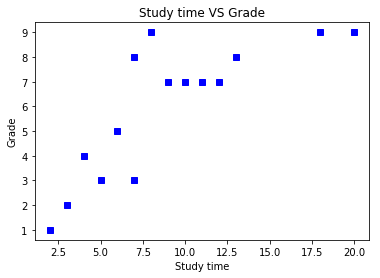

In [28]:

plt.plot(grades['Study time'], grades['Grade'],'bs')
plt.title('Study time VS Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

### There is a strong dependence between two parameters. the correlation is not larger, because there are some cases of students, who fortunately, they get high grade studying less hour than others classmates.

#### Could you explain the difference between Pearson and Spearman correlations?

#### The pearson correlation works evaluation the continuous data of two variables, checking how LINEAR it is. So then, it means how the strong is the dependence and proportional is the relationship between two variables.


#### The spearman correlations worsk evaluating the ranks of the data. It checks how is the relationships according its monotony (ascending or descending). It implies, this corr. evaluates if the variables change together, but not necessarily at same ratio.